<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Time_Series_using_Prophet_Trend_Non_Stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to video explaining the code - https://www.youtube.com/watch?v=iuwcHhGNb8A

In [ ]:
!pip install fbprophet

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv')

In [ ]:
df['Quarter']=pd.to_datetime(df['Quarter'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [ ]:
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [ ]:
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Profits')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
amazon_df=df[['Quarter','Revenue']].rename({'Quarter':'ds','Revenue':'y'}, axis='columns')

In [ ]:
amazon_df

,ds,y
0,2020-03-31,75452
1,2019-12-31,87437
2,2019-09-30,69981
3,2019-06-30,63404
4,2019-03-31,59700
...,...,...
56,2006-03-31,2279
57,2005-12-31,2977
58,2005-09-30,1858
59,2005-06-30,1753


In [ ]:
train=amazon_df[(amazon_df['ds'] >= '2005-03-31') & (amazon_df['ds'] <= '2019-03-31')]
test=amazon_df[(amazon_df['ds'] > '2019-03-31')]

In [ ]:
train.shape

(57, 2)

In [ ]:
test.shape

(4, 2)

In [ ]:
m = Prophet(interval_width=0.95)

In [ ]:
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=4, freq='Q')
future.tail()

,ds
56,2019-03-31
57,2019-06-30
58,2019-09-30
59,2019-12-31
60,2020-03-31


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,61089.496702,57099.424196,65352.808341
57,2019-06-30,63195.117245,59115.126618,67408.018580
58,2019-09-30,66153.769212,61936.533615,70209.078722
59,2019-12-31,74249.538229,69886.534547,78388.413312
60,2020-03-31,70663.367667,66573.489585,75201.230316


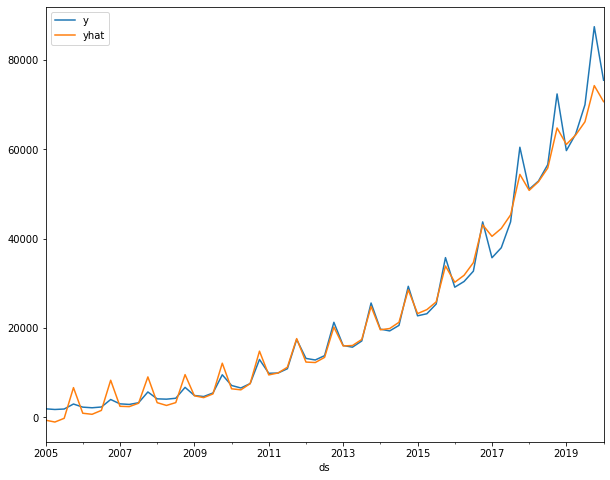

In [ ]:
pd.concat([amazon_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

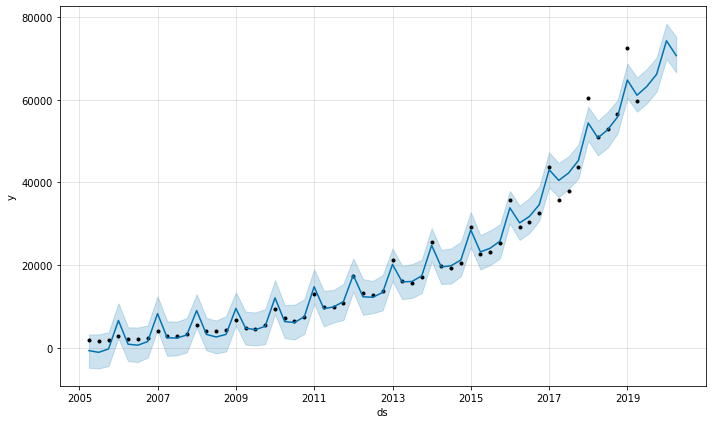

In [ ]:
fig1 = m.plot(forecast)

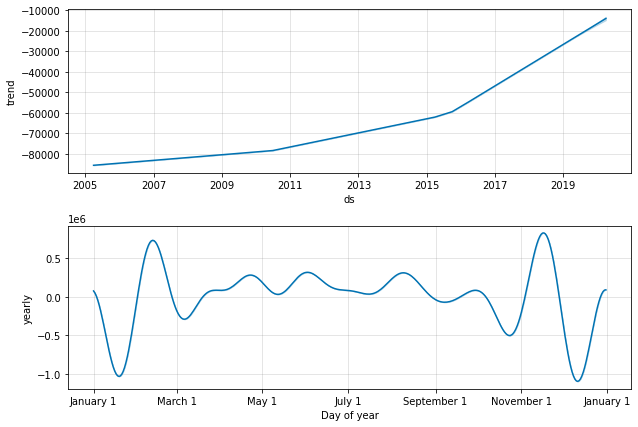

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
holiday_sale = pd.DataFrame({
  'holiday': 'dec_jan_sale',
  'ds': pd.to_datetime(['	2019-12-31', '2018-12-31', '2017-12-31', '2016-12-31',
                        '2015-12-31', '2014-12-31','2013-12-31','2012-12-31','2011-12-31','2010-12-31','2009-12-31','2008-12-31','2007-12-31',
                        '2006-12-31','2005-12-31']),
  'lower_window': 0,
  'upper_window': 1,
})

In [ ]:
m2 = Prophet(interval_width=0.95, seasonality_mode='multiplicative', holidays=holiday_sale)

In [ ]:
m2.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = m2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,60105.339695,58149.092748,61770.652087
57,2019-06-30,62632.831894,60751.559039,64437.010170
58,2019-09-30,67797.199969,65949.925908,69627.479865
59,2019-12-31,89334.669448,87441.334935,91328.075629
60,2020-03-31,66853.826595,64897.934991,69120.479725


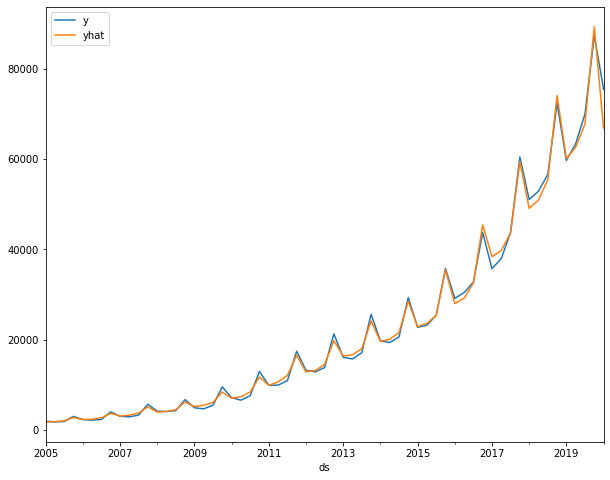

In [ ]:
pd.concat([amazon_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

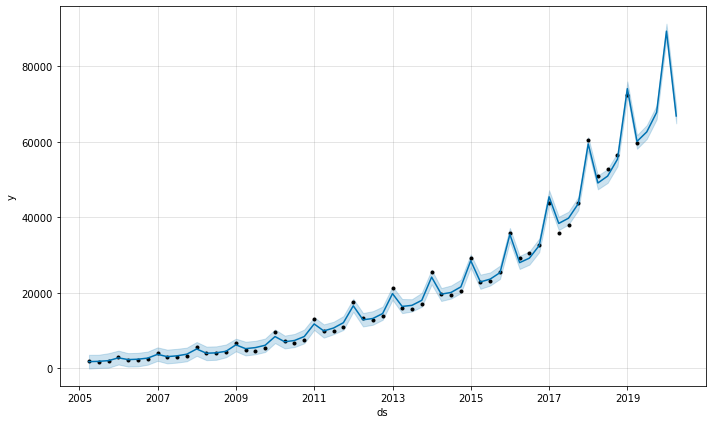

In [ ]:
fig1 = m2.plot(forecast)

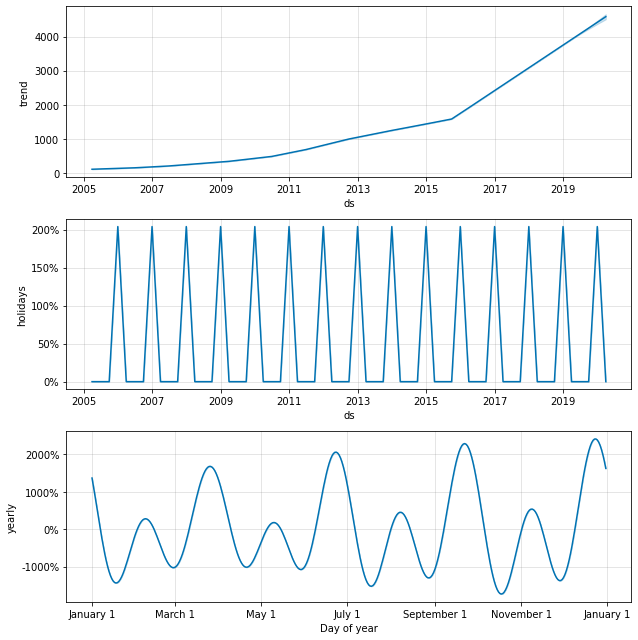

In [ ]:
fig2 = m2.plot_components(forecast)